# Proposal on low risk aircraft purchase

## Introduction

This proposal aims to generate insights for business stakeholders in a company diversifying its portfolio into the aviation industry. Given the extensivess of the data sourced from the National Transportation Safety Booard from 1962 about civil aviation accidents and selected incidents in the United States and international waters, this proposal will focus on the data from 2000 onwards. This will provide a great balance between being recent enough to reflect modern technology and safety regulations as well as long enough to capture meaningful data relating to the accidents/incidents. The proposal looks at various
relationships present in the data such as engine type and incidences of fatal injuries which feed into the business recommendations centered around reduced liability for the company. Finally, the report concludes highlighting additional considerations not present in the proposal that the company needs to take into account.

The proposal is split into the following sections:

1. Business Problem
2. Data
3. Methodology
4. Business Recommendation
5. Conclusion


## Business Problem

The company would like to expand in to new industries to diversify its portfolio. Specifically, the company is interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. This proposal will aim to determine which models of aircraft are the lowest risk for the company to start this new business endeavor as well as translate findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data
Data used for this analysis is sourced from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. This data can be found in `AviationData.csv`.





## Methodology
We will use data cleaning, imputation, analysis, and visualizations to generate the required insights for business stakeholders. As such this section will be divided as follows:

1. Importing data 
2. Dealing with missing data, unknowns and outliers in the data
3. Analysis and visualizations


###  1. Importing the data


To begin, we'll start by importing all the necessary libraries needed for this analysis. These are listed below:

- **Pandas** - This library will assist with the manipulation of data in the DataFrame
- **Numpy** - This library will enable us to compute mathematical and statistical functions.
- **Matplotlib** - This library will help us visulaize the data as part of the analysis
- **Seaborn** - An added library whihc will build upon matplotlib to generate data visualizations.


In [300]:
#import the required libraries as set below

import pandas as pd # imports pandas with an alias pd
import numpy as np  # imports numpy with an alias np
import matplotlib.pyplot as plt # imports matplotlib.pyplot with an alias plt
import seaborn as sns # imports seaborn with an alias sns

#Ensures the graphs in the notebook display immediately below the cell that creates them
%matplotlib inline  
 

Now, let's get started by reading in the data from the `AviationData.csv` file and storing it the DataFrame `aviation_df`. In addition, we'll preview the data.

In [301]:
aviation_df = pd.read_csv("AviationData.csv", dtype='unicode') # reads in the data and specifies the data type in case 
                                                      # there are conflicting data types in a column
aviation_df.head()                                             # Gives a preview of the top five rows of the dataframe

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16/04/1980


####  1.1. Ensuring data has been loaded successfully

We will now have a look at the dimensions of the imported data (i.e.rows and columns in  `aviation_df`)

In [302]:
# Gives us the dimensions of the dataframe
aviation_df.shape

(88889, 31)

Let's now have a look at the bottom five rows of the dataframe.

In [303]:
# Gives us an overview of the bottom five rows of the data
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0,0,0,0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0,1,0,1,NaN,NaN,NaN,30/12/2022


From the checks above, the dataset has been loaded successfully. The bottom row indexes are as expected (matches up with the total number of rows). 

Also, the structure of the bottom rows are consistent with the top five rows so no further manipulation is required on this end. Now let's look at the summary of the data set below:


In [304]:
# Gets a concise summary of the dataframe
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50249 non-null  object
 9   Airport.Name            52790 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87572 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

From the summary above, we can see that all the columns are `string` data type. Moreover, columns such as `Latitude` and `Longitude` have a lot of missing entries. Thus, we need to generate a dataframe that we will use for this analysis without altering the data that has been imported already. The new dataframe will be called `modified_aviation_df`.

Also column names are separated by a full stop which might make it a bit confusing when using some of the python functions later on. Therefore, we will begin by modifying the column names and replacing the full stops with underscores.

In [305]:
# Add in a code to replace the "." with "_" as the name separator in the dataframe column names

modified_aviation_df = aviation_df.rename(columns=lambda name: name.replace('.', '_'))
modified_aviation_df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16/04/1980



####  1.2. Selecting data subset to be used in the proposal

Now that the column names are clear, we can select the subset of data we are dealing with. As mentioned earlier we are only interested in the following columns for our analysis:

- `Make`
- `Model`
- `Investigation_Type`
- `Event_Date`
- `Aircraft_damage`
- `Amateur_Built`
- `Number_of_Engines`
- `Engine_Type`
- `Purpose_of_flight`
- `Total_Fatal_Injuries`
- `Total_Serious_Injuries`
- `Total_Minor_Injuries`
- `Total_Uninjured`



In [306]:
#subset containing only the required columns needed
required_cols = ["Make","Model","Investigation_Type","Event_Date","Aircraft_damage",
                 "Amateur_Built","Number_of_Engines","Engine_Type","Purpose_of_flight","Total_Fatal_Injuries",
                "Total_Serious_Injuries","Total_Minor_Injuries","Total_Uninjured"]

modified_aviation_df_2 = modified_aviation_df[required_cols]
modified_aviation_df_2.head()


,Make,Model,Investigation_Type,Event_Date,Aircraft_damage,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,Stinson,108-3,Accident,24/10/1948,Destroyed,No,1,Reciprocating,Personal,2,0,0,0
1,Piper,PA24-180,Accident,19/07/1962,Destroyed,No,1,Reciprocating,Personal,4,0,0,0
2,Cessna,172M,Accident,30/08/1974,Destroyed,No,1,Reciprocating,Personal,3,NaN,NaN,NaN
3,Rockwell,112,Accident,19/06/1977,Destroyed,No,1,Reciprocating,Personal,2,0,0,0
4,Cessna,501,Accident,02/08/1979,Destroyed,No,NaN,NaN,Personal,1,2,NaN,0


We can now deal with the missing data in our subset to be used in the analysis. Before we proceed, we will have another summary look at the modified dataframe `modified_aviation_df_2` .

In [307]:
modified_aviation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    88826 non-null  object
 1   Model                   88797 non-null  object
 2   Investigation_Type      88889 non-null  object
 3   Event_Date              88889 non-null  object
 4   Aircraft_damage         85695 non-null  object
 5   Amateur_Built           88787 non-null  object
 6   Number_of_Engines       82805 non-null  object
 7   Engine_Type             81812 non-null  object
 8   Purpose_of_flight       82697 non-null  object
 9   Total_Fatal_Injuries    77488 non-null  object
 10  Total_Serious_Injuries  76379 non-null  object
 11  Total_Minor_Injuries    76956 non-null  object
 12  Total_Uninjured         82977 non-null  object
dtypes: object(13)
memory usage: 8.8+ MB


### 2. Dealing with missing and unknown data

From the summary above, the dataframe is missing a lot of values in some of the columns. We will approach this section by dividing the columns based on whether they are:
- Categorical
- Numerical

#### 2.1. Categorical columns

#####  a. Dealing with missing values

We will begin by eliminating the null values in the following categorical columns as it will be a small subset of rows and hence won't have much of an impact on the analysis given the large dataset:
 - `Make`
 - `Model`
 - `Aircraft Damage`
 - `Amateur Built`
 - `Aircraft_damage`
 - `Purpose_of_flight`
 - `Engine_Type`

In [308]:
#Code to remove all the null values in the listed columns above

modified_aviation_df_2 = modified_aviation_df_2.dropna(subset=["Make", "Model","Amateur_Built","Aircraft_damage",
                                                               "Purpose_of_flight","Engine_Type"])

#Get a summary of the modified dataframe to ensure that all the nulls have been eliminated in these columns
modified_aviation_df_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77551 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    77551 non-null  object
 1   Model                   77551 non-null  object
 2   Investigation_Type      77551 non-null  object
 3   Event_Date              77551 non-null  object
 4   Aircraft_damage         77551 non-null  object
 5   Amateur_Built           77551 non-null  object
 6   Number_of_Engines       75873 non-null  object
 7   Engine_Type             77551 non-null  object
 8   Purpose_of_flight       77551 non-null  object
 9   Total_Fatal_Injuries    68036 non-null  object
 10  Total_Serious_Injuries  67123 non-null  object
 11  Total_Minor_Injuries    67853 non-null  object
 12  Total_Uninjured         72738 non-null  object
dtypes: object(13)
memory usage: 8.3+ MB


##### b. Dealing with unknown or duplicate values

Now that we have eliminated the null values in the columns above, we need to ensure that all the entries in each of the columns are valid. To do so, we will go column by column and check that the `value_counts` line up.

- `Make`

This column has values which have been repeated either due to:
   - spacing used on the entries
   - some entries are upper case while others are lower case

In [309]:
# this code generates the unique values present in make column. As can be seem there are quite a few repetitions such as
# Cessna, Piper etc

modified_aviation_df_2["Make"].value_counts()

Cessna            21542
Piper             11701
Beech              4139
CESSNA             3732
PIPER              2222
                  ...  
Oakes                 1
Huntley               1
CROFT ROBERT C        1
Fawcett               1
Prout                 1
Name: Make, Length: 7572, dtype: int64

Thus to eliminate this, we'll use the code below to strip out the white space in each of the entries and make all the entries lower case.

In [310]:

modified_aviation_df_2["Make"]= modified_aviation_df_2["Make"].str.strip() # Strips out the white space in the column entries

modified_aviation_df_2["Make"] = modified_aviation_df_2["Make"].apply(lambda x: x.lower()) # lowers the case of column entries


In [311]:
#Checks and confirms that indeed the value counts are now unique

make_value_counts = modified_aviation_df_2["Make"].value_counts()
make_value_counts

cessna           25274
piper            13923
beech             4885
bell              2244
mooney            1267
                 ...  
gordon price         1
arnold forest        1
mazzon               1
zeigler              1
bernard              1
Name: Make, Length: 7040, dtype: int64

One final issue arises. The value counts summary above contain names of peope or aircraft operators therefore we don't have an accurate picture of the makes of the aircraft. For this step, we will assume that any entry with a value count greater than three corresponds to a wrong entry which needs to be eliminated. To get rid of these entries we will use the code below: 

In [312]:
modified_aviation_df_2 = modified_aviation_df_2[modified_aviation_df_2["Make"].isin(make_value_counts[make_value_counts > 3].index)]

Now let's confirm that all the changes done to this column have been updated correctly. From the summary below, everything checks out now.

In [313]:
modified_aviation_df_2["Make"].value_counts()

cessna                    25274
piper                     13923
beech                      4885
bell                       2244
mooney                     1267
                          ...  
pilatus aircraft ltd          4
liberty aerospace inc.        4
siai marchetti                4
sonerai                       4
helicopteres guimbal          4
Name: Make, Length: 576, dtype: int64

 - `Model`
 
Entries in this column line up so no further changes need to be done to it.


In [314]:
modified_aviation_df_2["Model"].value_counts()

152               2316
172               1588
172N              1125
PA-28-140          895
150                779
                  ... 
PA 18-125            1
Lightning LS-1       1
SA 227               1
T-28                 1
SGS 1-23             1
Name: Model, Length: 7312, dtype: int64

 - `Aircraft_damage`
 
This column has a value that is "Unknown". As the number of entries are quite small, we will eliminate this from our analysis.

In [315]:
#Checks the unique values in the "Aircraft_Damage" column

modified_aviation_df_2["Aircraft_damage"].value_counts()

Substantial    53483
Destroyed      14969
Minor           1710
Unknown            5
Name: Aircraft_damage, dtype: int64

In [316]:

#filter all the unknown entries in the "Aircraft_damage" column
filt = modified_aviation_df_2["Aircraft_damage"] == "Unknown"

# Code to remove the unknown entries in the Aircraft_damage column
modified_aviation_df_2 = modified_aviation_df_2.drop(index = modified_aviation_df_2[filt].index)


As we have been doing, we need to confirm that the values in the column have now been updated.

In [317]:
modified_aviation_df_2["Aircraft_damage"].value_counts()

Substantial    53483
Destroyed      14969
Minor           1710
Name: Aircraft_damage, dtype: int64

 - `Engine_Type`
 
This column has two values i.e. "Unknown"  and "None" (both in upper and lower case) which need to be eliminated before proceeding with any further meaningful analysis.

In [318]:
#Checks the unique values and their counts in the "Engine_Type" column 

modified_aviation_df_2["Engine_Type"].value_counts()

Reciprocating    61458
Turbo Shaft       3042
Turbo Prop        2625
Unknown           1647
Turbo Fan          978
Turbo Jet          403
None                 6
UNK                  1
NONE                 1
LR                   1
Name: Engine_Type, dtype: int64

We will start first by ensuring all the entries are lower case as can be seen by the code box below:

In [319]:
#Code to change all entries in the "Engine_Type" column to lower-case

modified_aviation_df_2["Engine_Type"]= modified_aviation_df_2["Engine_Type"].apply(lambda x: x.lower())
modified_aviation_df_2["Engine_Type"].value_counts()

reciprocating    61458
turbo shaft       3042
turbo prop        2625
unknown           1647
turbo fan          978
turbo jet          403
none                 7
unk                  1
lr                   1
Name: Engine_Type, dtype: int64

Now that all the entries in the `Engine_Type` column are now lower case, next steps is to eliminate all the "unknown" ,"none", "unk" and "lr" entries as shown below:

In [320]:

# this filter indicates the conditions to be applied to the dataframe to remove the unwanted values
filt_2 = (modified_aviation_df_2["Engine_Type"] == "unknown") | (modified_aviation_df_2["Engine_Type"] == "none")| (modified_aviation_df_2["Engine_Type"] == "unk")  | (modified_aviation_df_2["Engine_Type"] == "lr")

#this command drops all the rows which meet the conditions set out by the filter
modified_aviation_df_2 = modified_aviation_df_2.drop(index = modified_aviation_df_2[filt_2].index)

Finally, we confirm that all the changes have now been made to the entries in the column.

In [321]:
modified_aviation_df_2["Engine_Type"].value_counts()

reciprocating    61458
turbo shaft       3042
turbo prop        2625
turbo fan          978
turbo jet          403
Name: Engine_Type, dtype: int64

- `Purpose_of_Flight`

This column has a value that is "Unknown". As the the number of entries are quite small, we will eliminate them from our analysis.


In [322]:
modified_aviation_df_2["Purpose_of_flight"].value_counts()

Personal                     39843
Instructional                 9650
Unknown                       5044
Aerial Application            4464
Business                      3639
Positioning                   1469
Other Work Use                1040
Ferry                          724
Aerial Observation             679
Public Aircraft                577
Executive/corporate            485
Flight Test                    206
Skydiving                      164
Banner Tow                      95
External Load                   93
Public Aircraft - Federal       82
Public Aircraft - Local         66
Public Aircraft - State         58
Air Race show                   35
Glider Tow                      33
Air Race/show                   30
Firefighting                    19
Air Drop                         8
PUBS                             2
PUBL                             1
Name: Purpose_of_flight, dtype: int64

In [323]:
#filter rows where there are unknown entries in the "Purpose_of_flight" column
filt_3 = modified_aviation_df_2["Purpose_of_flight"] == "Unknown"

#this command drops all the rows which meet the conditions set out by the filter
modified_aviation_df_2 = modified_aviation_df_2.drop(index = modified_aviation_df_2[filt_3].index)


In [324]:
modified_aviation_df_2["Purpose_of_flight"].value_counts()

Personal                     39843
Instructional                 9650
Aerial Application            4464
Business                      3639
Positioning                   1469
Other Work Use                1040
Ferry                          724
Aerial Observation             679
Public Aircraft                577
Executive/corporate            485
Flight Test                    206
Skydiving                      164
Banner Tow                      95
External Load                   93
Public Aircraft - Federal       82
Public Aircraft - Local         66
Public Aircraft - State         58
Air Race show                   35
Glider Tow                      33
Air Race/show                   30
Firefighting                    19
Air Drop                         8
PUBS                             2
PUBL                             1
Name: Purpose_of_flight, dtype: int64

The remaining categorical columns do not have any issues so we are good to proceed to the numerical columns. 

Before that, let's get a summary of the dataframe to ensure that the data lines up as expected. We can observe that all the columns modified have all been updated correctly and we are now left with the numerical columns to be tackled in the section below.

In [325]:

modified_aviation_df_2.info() #provided a summary of the updated dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63462 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    63462 non-null  object
 1   Model                   63462 non-null  object
 2   Investigation_Type      63462 non-null  object
 3   Event_Date              63462 non-null  object
 4   Aircraft_damage         63462 non-null  object
 5   Amateur_Built           63462 non-null  object
 6   Number_of_Engines       63044 non-null  object
 7   Engine_Type             63462 non-null  object
 8   Purpose_of_flight       63462 non-null  object
 9   Total_Fatal_Injuries    55242 non-null  object
 10  Total_Serious_Injuries  54530 non-null  object
 11  Total_Minor_Injuries    55203 non-null  object
 12  Total_Uninjured         59655 non-null  object
dtypes: object(13)
memory usage: 6.8+ MB


####  2.2. Numerical Columns

From the summary above, we can observe that all the column types are of datatype "object". However, there are certain columns such as `Event_date`, `Total_Fatal_Injuries`, `Total_Serious_Injuries`, `Total_Minor_Injuries` and `Total_Uninjured` which have been classified as `object` but need to be `float` or `datetime` data types. 

##### a. Converting the data types of the numerical columns

We will convert the following listed columns to the "Float" datatype:

- `Total_Fatal_Injuries` 
- `Total_Serious_Injuries`
- `Total_Minor_Injuries`
- `Total_Uninjured`
- `Number_of_Engines`

In [326]:

#These set of codes convert the columns listed to float dtype

#converts "Total_Fatal_Injuries" to float dtype
modified_aviation_df_2['Total_Fatal_Injuries']=pd.to_numeric(modified_aviation_df_2["Total_Fatal_Injuries"], errors='coerce') 

#converts "Total_Serious_Injuries" to float dtype
modified_aviation_df_2['Total_Serious_Injuries']=pd.to_numeric(modified_aviation_df_2["Total_Serious_Injuries"], errors='coerce') 

#converts "Total_Minor_Injuries" to float dtype
modified_aviation_df_2['Total_Minor_Injuries']=pd.to_numeric(modified_aviation_df_2["Total_Minor_Injuries"], errors='coerce') 

#converts "Total_Uninjured" to float dtype
modified_aviation_df_2['Total_Uninjured']=pd.to_numeric(modified_aviation_df_2["Total_Uninjured"], errors='coerce') 

#converts "Number_of_Engines" to float dtype
modified_aviation_df_2['Number_of_Engines']=pd.to_numeric(modified_aviation_df_2["Number_of_Engines"], errors='coerce')


Next step is to convert the `Event_Date` column to datetime format as shown below:

In [327]:
#converts "Event_Date" column to date time format

modified_aviation_df_2["Event_Date"] = pd.to_datetime(modified_aviation_df_2["Event_Date"]) 

Now, we need to check that all the data type changes have been updated:

In [328]:
# Gives a summary overview of teh columns and their corresponding datatypes
modified_aviation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63462 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    63462 non-null  object        
 1   Model                   63462 non-null  object        
 2   Investigation_Type      63462 non-null  object        
 3   Event_Date              63462 non-null  datetime64[ns]
 4   Aircraft_damage         63462 non-null  object        
 5   Amateur_Built           63462 non-null  object        
 6   Number_of_Engines       63044 non-null  float64       
 7   Engine_Type             63462 non-null  object        
 8   Purpose_of_flight       63462 non-null  object        
 9   Total_Fatal_Injuries    55242 non-null  float64       
 10  Total_Serious_Injuries  54530 non-null  float64       
 11  Total_Minor_Injuries    55203 non-null  float64       
 12  Total_Uninjured         59655 non-null  float6

The datatypes are now aligned and we can now proceed with dealing with null values. 

##### b. Dealing with missing values

As a start we need to check and identify the columns having the missing values.

In [329]:
#Gives a summary of the total null values present in ouur dataset

modified_aviation_df_2.isna().sum()

Make                         0
Model                        0
Investigation_Type           0
Event_Date                   0
Aircraft_damage              0
Amateur_Built                0
Number_of_Engines          418
Engine_Type                  0
Purpose_of_flight            0
Total_Fatal_Injuries      8220
Total_Serious_Injuries    8932
Total_Minor_Injuries      8259
Total_Uninjured           3807
dtype: int64

The numerical columns seem to have a sizeable number of missing values. `Total_Serious_Injuries` looks to be leading with the highest number of missing values while `Number_of_Engines` has the least. 

As we don't want to lose a sizeable chunk of the data, we are going to replace the missing data with the most appropriate central measure of tendency. To determine the best measure of central tendency, we will first begin by checking for outliers.

- **Check for outliers**

We will create a new dataframe and call it `modified_aviation_df_3` . Within this dataframe, we will include only the columns with null values. The main reason for doing this analysis separately is to allow us to calculate the appropriate measure of central tendency without having to alter the already cleaned data thus far.

In [330]:
#Generates a new dataframe separate from the one we have been working on

modified_aviation_df_3 = modified_aviation_df_2[["Number_of_Engines","Total_Fatal_Injuries","Total_Serious_Injuries",
                                               "Total_Minor_Injuries","Total_Uninjured"]]

modified_aviation_df_3.head()                   #Top 5 entries of the newly generated datafra,e 



,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,1.0,2.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,1.0,3.0,NaN,NaN,NaN
3,1.0,2.0,0.0,0.0,0.0
6,1.0,4.0,0.0,0.0,0.0


We will now proceed with removing all the null values in the dataframe and obtain the summary statistics.

In [331]:
#Removes all the null values in the DataFrame

modified_aviation_df_3 = modified_aviation_df_3.dropna()

In [332]:
#Code to generate the summary statistics of the Dataframe

modified_aviation_df_3.describe()

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,52966.000000,52966.000000,52966.000000,52966.000000,52966.000000
mean,1.100310,0.334932,0.195541,0.247574,1.133671
std,0.310125,0.942732,0.561716,0.703950,2.582346
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,4.000000,82.000000,17.000000,62.000000,412.000000


Once we've dropped the null entries, we can see that all these columns are positively skewed. Also the difference between the min and max entries is quite large in all the columns . From this initial analysis, it seems the median would be the best substitute for these missing values but we will have a look at box plots and histograms of these columns just to be sure

- `Number_of_Engines` **and** `Total_Fatal_Injuries`

For these columns, we will look at histograms of the column data to observe the distribution. It does seem that majority of the entries are centered around the median and that no significant outliers are present.

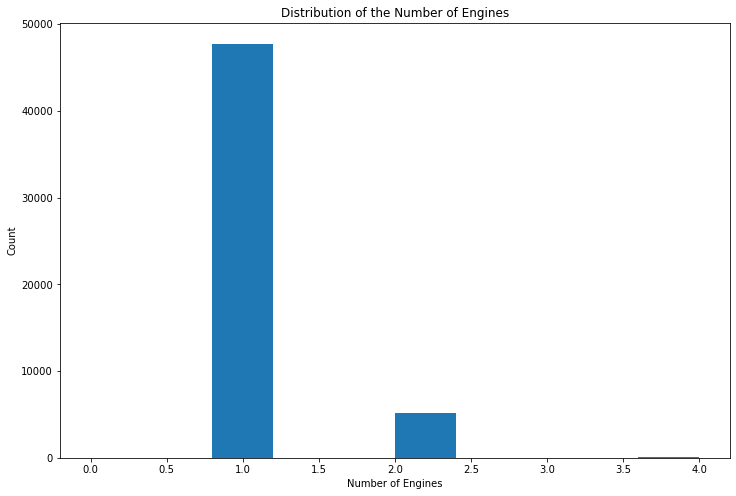

In [333]:
fig, ax = plt.subplots(figsize = (12,8))

ax.hist(modified_aviation_df_3["Number_of_Engines"],bins = 10) #Plots the histogram with bins =10
ax.set_title("Distribution of the Number of Engines")          #Inputs the title
ax.set_xlabel("Number of Engines")                             #Inputs the x-axis label  
ax.set_ylabel("Count");                                        #Inputs the y-axis label


''

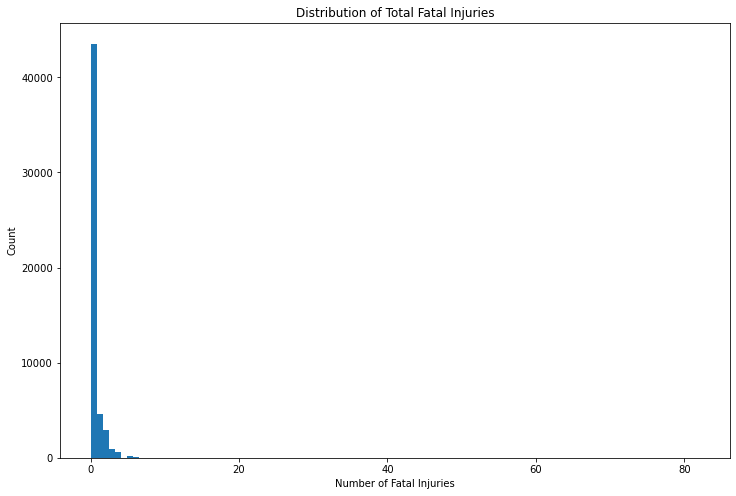

In [334]:
fig, ax = plt.subplots(figsize = (12,8))

ax.hist(modified_aviation_df_3["Total_Fatal_Injuries"],bins = 100) #Plots the histogram with bins =50
ax.set_title("Distribution of Total Fatal Injuries")               #Inputs the title
ax.set_xlabel("Number of Fatal Injuries")                          #Inputs the x-axis label  
ax.set_ylabel("Count");                                            #Inputs the y-axis label

;

 - `Total_Minor_Injuries` **and** `Total_Uninjured`
 
 With these two columns, we'll proceed differently and check the boxplots for outliers and if the data is positively skewed. Due to the large difference between the maximum and minimum values, it can be observed that the box plot values are centered around the median with a few outliers present which do not alter the distribution of the columns significantly. 

''

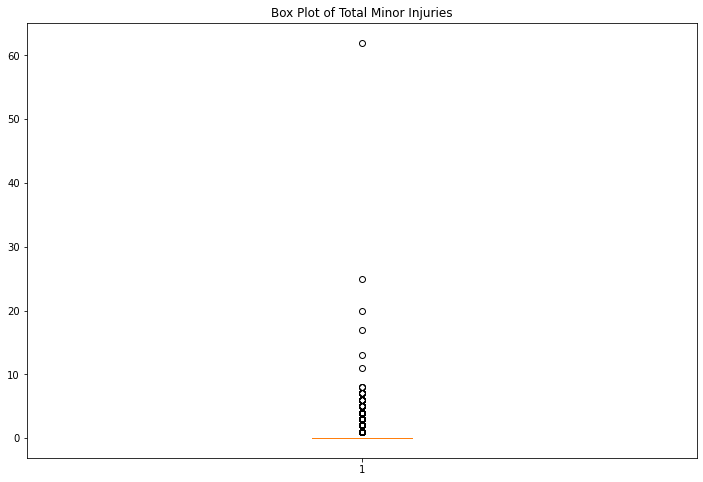

In [335]:
fig, ax = plt.subplots(figsize = (12,8))

ax.boxplot(modified_aviation_df_3["Total_Minor_Injuries"])
ax.set_title("Box Plot of Total Minor Injuries")
;

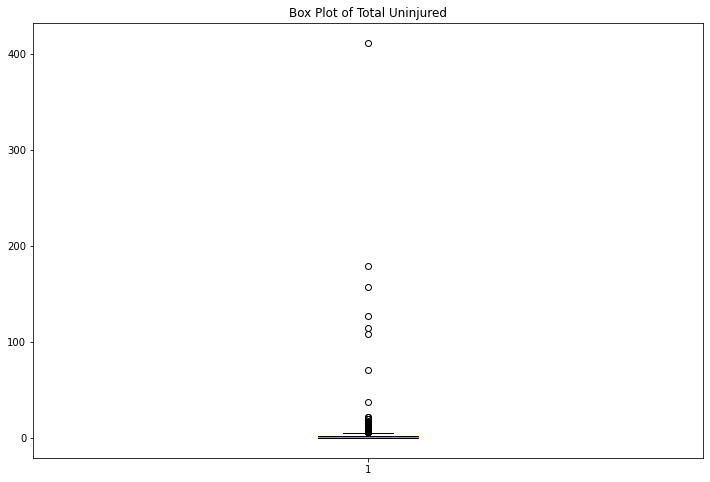

In [336]:
fig, ax = plt.subplots(figsize = (12,8))

ax.boxplot(modified_aviation_df_3["Total_Uninjured"])
ax.set_title("Box Plot of Total Uninjured");

Given the findings from the summary table above as well as the boxplots and histographs, we will proceed with replacing all the null values in our numerical columns with their corresponding median. To do so, we will go back to the dataframe `modified aviation_2` which contained our null values and fill them with the median value.

In [337]:
#fill na with median of the values:

#fill na in the "Number_of_Engines" column with the median value of this column
modified_aviation_df_2['Number_of_Engines']=modified_aviation_df_2["Number_of_Engines"].fillna(modified_aviation_df_2["Number_of_Engines"].median())

#fill na in the "Total_Fatal_Injuries" column with the median in this column
modified_aviation_df_2['Total_Fatal_Injuries']=modified_aviation_df_2["Total_Fatal_Injuries"].fillna(modified_aviation_df_2["Total_Fatal_Injuries"].median())

#fill na in the "Total_Serious_Injuries" column with the median in this column
modified_aviation_df_2['Total_Serious_Injuries']=modified_aviation_df_2["Total_Serious_Injuries"].fillna(modified_aviation_df_2["Total_Serious_Injuries"].median())

#fill na in the "Total_Minor_Injuries" column with the median in this column
modified_aviation_df_2['Total_Minor_Injuries']=modified_aviation_df_2["Total_Minor_Injuries"].fillna(modified_aviation_df_2["Total_Minor_Injuries"].median())

#fill na in the "Total_Uninjured" column with the median in this column
modified_aviation_df_2['Total_Uninjured']=modified_aviation_df_2["Total_Uninjured"].fillna(modified_aviation_df_2["Total_Uninjured"].median())



Finally, let's check that these changes have been effected. From the summary below, we can observe that all the columns are now updated with the changes and the data is now ready for analysis.

In [338]:
modified_aviation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63462 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    63462 non-null  object        
 1   Model                   63462 non-null  object        
 2   Investigation_Type      63462 non-null  object        
 3   Event_Date              63462 non-null  datetime64[ns]
 4   Aircraft_damage         63462 non-null  object        
 5   Amateur_Built           63462 non-null  object        
 6   Number_of_Engines       63462 non-null  float64       
 7   Engine_Type             63462 non-null  object        
 8   Purpose_of_flight       63462 non-null  object        
 9   Total_Fatal_Injuries    63462 non-null  float64       
 10  Total_Serious_Injuries  63462 non-null  float64       
 11  Total_Minor_Injuries    63462 non-null  float64       
 12  Total_Uninjured         63462 non-null  float6

### 3. Analysis and Visualizations

Now that the data has been cleaned, we will now proceed with the analysis. As the data spans a long period i.e. 1962 -2023, we need to have a look at how the aviation accidents are spread out during this period. Also, this will determine the appropriate time frame to base our study on. To assist us with this we will plot the following graphs:

- Time series of total injuries( fatal, serious and minor)
- Time series of total uninjured

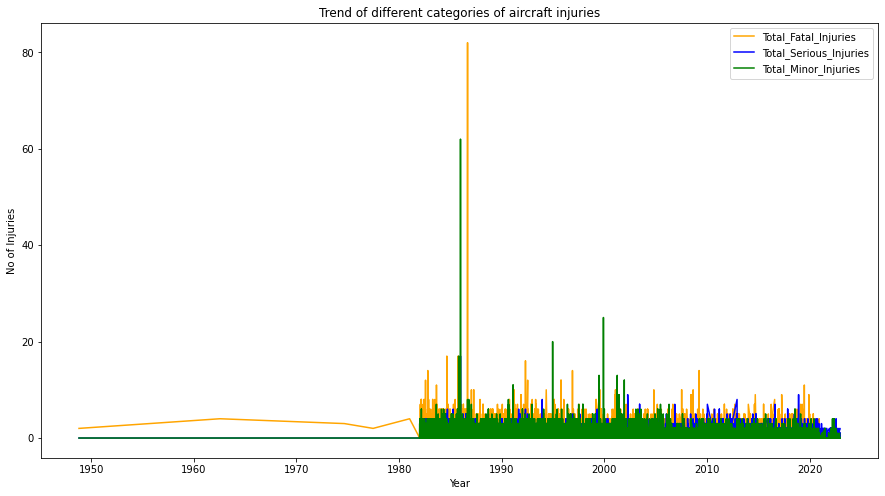

In [339]:
#Time series plot showing the trend of  different aviation injuries over time

fig,ax  = plt.subplots(figsize = (15,8))


ax.plot(modified_aviation_df_2["Event_Date"],modified_aviation_df_2["Total_Fatal_Injuries"], color='orange', label='Total_Fatal_Injuries')
ax.plot(modified_aviation_df_2["Event_Date"],modified_aviation_df_2 ["Total_Serious_Injuries"], color='blue', label='Total_Serious_Injuries')
ax.plot(modified_aviation_df_2["Event_Date"],modified_aviation_df_2["Total_Minor_Injuries"], label='Total_Minor_Injuries', color='green')

ax.set_title("Trend of different categories of aircraft injuries")
ax.set_xlabel("Year")
ax.set_ylabel("No of Injuries")
ax.legend();

From the graph above, it seems that there were a lot more aviation accidents/incidents in the 1980s to the late 1990s which resulted in higher fatal and serious injuries. This trend seems to have changed at the turn of the millenium . There could have been an implementation of major safety regulations which saw a major shift in air safety culture following high profile crashes. Similarly from the trend of the total uninjured below, we see a lot more spikes in the 1980s and 1990s as opposed to the post 2000 period. This implies there have been less aviation accidents/incidents in the post 2000 period which corroborates our findings as aforementioned. 

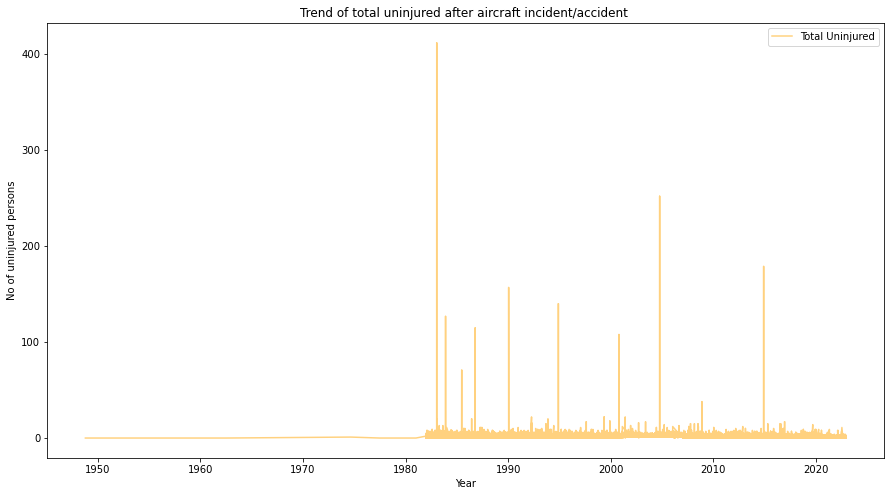

In [340]:
#Time series plot showing the trend of total uninjured persons over time

fig , ax =plt.subplots(figsize = (15,8))


ax.plot(modified_aviation_df_2["Event_Date"],modified_aviation_df_2["Total_Uninjured"], color='orange', label='Total Uninjured',alpha = 0.5);

ax.set_title("Trend of total uninjured after aircraft incident/accident ")
ax.set_xlabel("Year")
ax.set_ylabel("No of uninjured persons")
ax.legend();

As a result, we will only use the data from 2000 to date. This will provide us with a good balance between being recent enough to reflect modern technology and safety regulations as well as long enough to capture meaningful data relating to the accidents/incidents. 

#### Generating new dataset for the period (2000 - 2023)

The new dataset is generated by filtering the event date i.e. where the event date is later than 1 Jan 2000.

In [341]:
# new dataframe that captures only the dataset from 1 Jan 2000 to date. 

filtered_df = modified_aviation_df_2[modified_aviation_df_2['Event_Date'] > '2000-01-01']
filtered_df.head()


,Make,Model,Investigation_Type,Event_Date,Aircraft_damage,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
47677,cessna,172G,Accident,2000-02-01,Substantial,No,1.0,reciprocating,Personal,0.0,0.0,0.0,2.0
47678,cessna,172A,Accident,2000-02-01,Substantial,No,1.0,reciprocating,Instructional,0.0,0.0,1.0,0.0
47679,piper,PA-46-310P,Accident,2000-02-01,Substantial,No,1.0,turbo prop,Personal,0.0,0.0,0.0,5.0
47680,piper,PA-46-310P,Accident,2000-02-01,Substantial,No,1.0,reciprocating,Personal,0.0,0.0,0.0,2.0
47681,cessna,421B,Accident,2000-02-01,Destroyed,No,2.0,reciprocating,Personal,1.0,0.0,0.0,0.0


As always, it's great to have a summary of the newly created dataframe. We can obsere that the number of rows have reduced to roughly 26,000 from the 63,500 rows we started with. Also, all the characteristics of the columns are as expected so we will delve deep into the data and establish the relationships between the various aircraft characterictics and injuries.

In [342]:
#Provides us with the dimensions of the filtered dataframe

filtered_df.shape

(25933, 13)

In [343]:
#Gives a summary overview of columns in the dataframe with their corresponding data types.

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25933 entries, 47677 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    25933 non-null  object        
 1   Model                   25933 non-null  object        
 2   Investigation_Type      25933 non-null  object        
 3   Event_Date              25933 non-null  datetime64[ns]
 4   Aircraft_damage         25933 non-null  object        
 5   Amateur_Built           25933 non-null  object        
 6   Number_of_Engines       25933 non-null  float64       
 7   Engine_Type             25933 non-null  object        
 8   Purpose_of_flight       25933 non-null  object        
 9   Total_Fatal_Injuries    25933 non-null  float64       
 10  Total_Serious_Injuries  25933 non-null  float64       
 11  Total_Minor_Injuries    25933 non-null  float64       
 12  Total_Uninjured         25933 non-null  fl

#### 1. Relationship between Total Fatal Injuries & Total Uninjured and Engine type

We will plot two barcharts side by side to check if there is any relationship between engine type and aviation fatal injuries. 

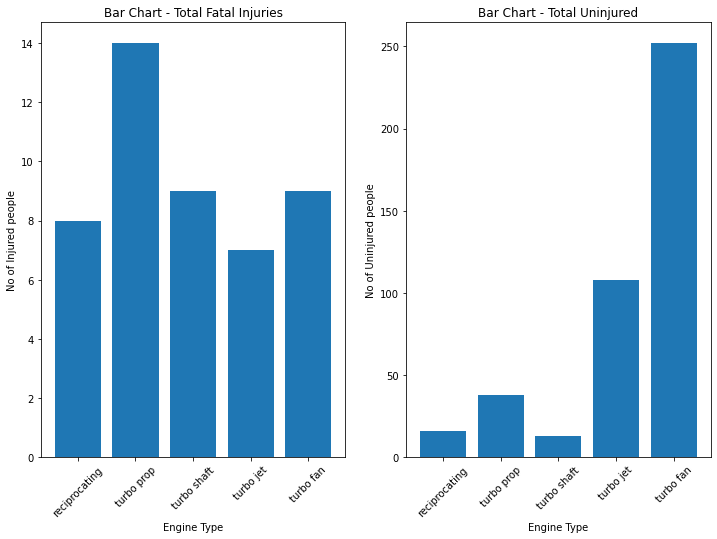

In [344]:
# Side by side bar chart to show comparison if the fatal injuries and uninjured persons vs engine type  

fig, ax = plt.subplots(1,2, figsize = (12,8))


ax[0].bar(filtered_df["Engine_Type"],filtered_df["Total_Fatal_Injuries"])
ax[0].set_title('Bar Chart - Total Fatal Injuries')
ax[0].set_xlabel('Engine Type')
ax[0].set_ylabel('No of Injured people')
ax[0].tick_params(axis="x", labelrotation= 45)

ax[1].bar(filtered_df["Engine_Type"],filtered_df["Total_Uninjured"])
ax[1].set_title('Bar Chart - Total Uninjured')
ax[1].set_xlabel('Engine Type')
ax[1].set_ylabel('No of Uninjured people')
ax[1].tick_params(axis="x", labelrotation= 45);


As can be observed,  the **turbo fan** engine had the highest number of uninjured persons while the **reciprocating** engine had the lowest number. On the other hand, in terms of fatalities, the **turbo prop** engine had the highest number of fatal injuries with the **turbo jet** having the least number. Thus, it does seem engine type goes a long way in determining the number of fatal injuries. Engines with a higher safety record tend to have lower fatal injuries. These engines, such as the turbo fan, would be the most preferred option for a company getting into the industry to reduce it's initial liability.

#### 2. Relationship between Total Fatal Injuries & Total Uninjured and No. of Engines

As we have determined that the engine type plays a role in the number of fatal injuries, we will take it a notch higher and check for any relationship between fatal injuries, uninjured and no. of engines. Similarly, to assist with this analysis, two barcharts will be plotted side by side as highlighted below:


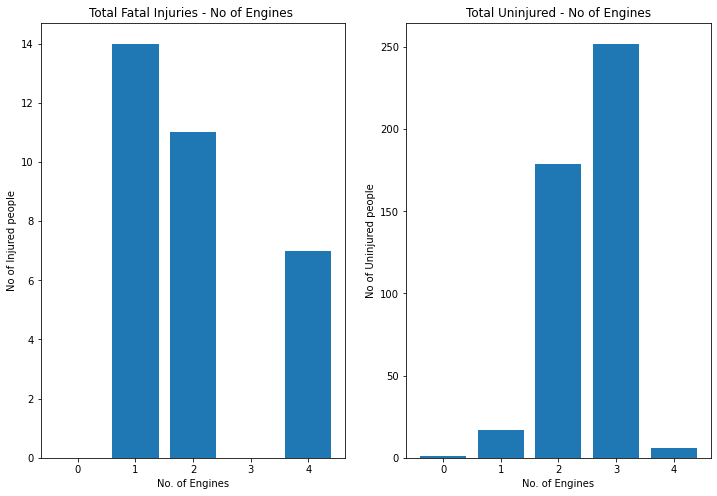

In [345]:
# Side by side bar chart to show comparison if the fatal injuries and uninjured persons vs No. of engines  

fig, ax = plt.subplots(1,2, figsize = (12,8))

ax[0].bar(filtered_df["Number_of_Engines"],filtered_df["Total_Fatal_Injuries"])
ax[0].set_title('Total Fatal Injuries - No of Engines ') 
ax[0].set_xlabel('No. of Engines')
ax[0].set_ylabel('No of Injured people')


ax[1].bar(filtered_df["Number_of_Engines"],filtered_df["Total_Uninjured"])
ax[1].set_title('Total Uninjured - No of Engines')
ax[1].set_xlabel('No. of Engines')
ax[1].set_ylabel('No of Uninjured people');



From the graphs above, we can see that the relationship is much more clearer this time around when compared to the engine type comparisons. Aircrafts with three engines had the highest number of uninjured persons and no total fatal injuries. On the other hand, aircraft with one engine had the leading number of total fatal injuries with the minimum number of uninjured persons. Thus, the company needs to ensure that they go for a plane with the number of engines that reduces the number of fatal injuries, in this case that would be planes with three engines.  



#### 3. Relationship between Purpose of flight and Total Fatal Injuries

Finally, we will look into whether the purpose of flying is related to the total fatal injuries. To do so we will plot a bargraph as follows:


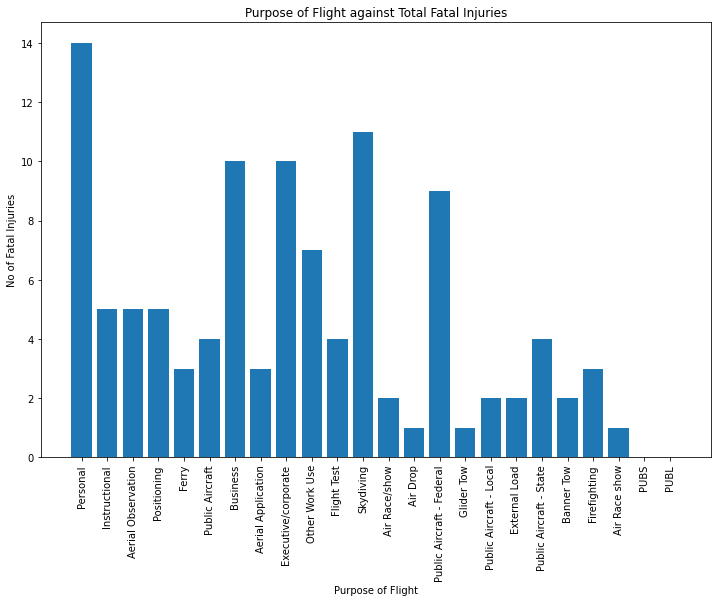

In [346]:
# Bar chart to show if there is any relationship between purpose of flying and total fatal injuries

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(filtered_df["Purpose_of_flight"],filtered_df["Total_Fatal_Injuries"])

ax.set_title("Purpose of Flight against Total Fatal Injuries")
ax.set_xlabel("Purpose of Flight")
ax.set_ylabel("No of Fatal Injuries")

ax.tick_params(axis="x", labelrotation= 90);

From the bargraph above, we can observe that personal flying had the highest incidences of fatal injuries with 14 fatal injuries followed by sky diving with 11 fatal injuries. Business and Executive /Corportae are tied at third place with 11 fatal injuries. Another interesting observation is nstructional,observation and aerial observation seem to be tied at 5 fatal injuries.

Something to note is that causality is not always causation. It could mean that there a lot more people using planes for personal reasons leading to more fatal injuries. However, it is difficult to deduce this given the nature of the dataset that we are dealing with.

## Business Recommendation


The business recommendations are based on the data provided and the analysis done on the data. Please note, other considerations such as purchase cost, servicing costs, insurance costs etc will not be not taken into account as they were no present in the data used for this analysis. The recommendations are centered on passenge safetyy and reduced liability to the company in the event of an accident/incident.

The following are the business recommendations for the company:

- **Engine Type**: The company should go for an aircraft with a turbo fan engine. From the analysis, this is the safest engine with the highest number of persons uninjured following an aviation incident/accident. Even though it wasn't the lowest in terms of fatal injuries, there was a really small difference with the engine with the least fatal injuries, the turbo jet engine.


- **No of Engines**: The company should invest in an aircraft that has 3 engines. We have seen from the analysis that this is the engine that offers the perfect combination i.e has the lowest number of fatal injuries and the highest number of uninjured persons in the event of an accident/incident. As a company making an entry into the aviation industry, this would limit its liability and minimize the probability of huge payoffs in the event of an accident/incident.

 
- **Airline business**: In terms of which flying business to venture in, the company has few options listed below:
         - Business
         - Positioning
         - Executive/Corporate
         - Aerial Application
Main reason behind these choices is that the planes that meeet the first two business recommendations tend to operate in these businesses. Given the company is a new entrant to the aviation industry and the scope of the data used in the analysis, it would be prudent to observe and research on these different flying business ventures from existing players to determine which of the above choices would suit it the best. 
      
Finally, based on the three recommendations above, the following aircraft makes fit the bill for the company to venture into the aviation industry with:

    - Dassault Aviation
    - Mcdonell Douglas
    - Dassault Bregguet
    
  The choice of model will depend on the aircraft business venture that the company would like to get into. Here's a summary table below: 
 
 **Note**: Assumption made that the aircraft will be insured hence aircraft damage will always be handled by the insurance company. 
 

In [347]:
#Filter to get the make and models of planes which meet the business criteria.

filt_4 = (filtered_df["Engine_Type"] == "turbo fan") & (filtered_df["Number_of_Engines"] == 3)
filtered_df_1 = filtered_df[filt_4]
filtered_df_1

,Make,Model,Investigation_Type,Event_Date,Aircraft_damage,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
54666,dassault aviation,DA-50,Accident,2003-05-21,Minor,No,3.0,turbo fan,Business,0.0,0.0,1.0,17.0
56476,mcdonnell douglas,DC-10-30,Accident,2004-10-04,Substantial,No,3.0,turbo fan,Public Aircraft,0.0,0.0,0.0,252.0
60269,dassault aviation,Falcon 900EX,Incident,2006-03-03,Minor,No,3.0,turbo fan,Business,0.0,0.0,0.0,3.0
62221,dassault aviation,Mystere Falcon 900C,Accident,2007-03-23,Substantial,No,3.0,turbo fan,Positioning,0.0,0.0,0.0,3.0
62673,dassault-breguet,Mystere Falcon 900,Accident,2007-10-06,Substantial,No,3.0,turbo fan,Executive/corporate,0.0,0.0,0.0,15.0
62783,mcdonnell douglas,DC 10-10,Accident,2007-06-25,Substantial,No,3.0,turbo fan,Aerial Application,0.0,0.0,0.0,3.0
63464,dassault aviation,Mystere Falcon 900,Accident,2007-09-28,Substantial,No,3.0,turbo fan,Executive/corporate,0.0,0.0,0.0,7.0
76516,dassault-breguet,MYSTERE FALCON 900,Incident,2015-04-16,Minor,No,3.0,turbo fan,Executive/corporate,0.0,0.0,0.0,15.0


In [348]:
# Export the modified data to be used in Tableau for additional visualizations

filtered_df.to_csv('AviationData_Modified.csv')

## Conclusion:

The proposal has looked at civil aviation accidents and selected incidents in the United States and international waters from 2000 to 2023 to determine the models of aircrafts that are the lowest risk for a company to venture into the aviation industry with. Engine type and number of engines were found to influence the number of total fatal injuries following an accident/incident. Aircrafts with turbo fan engine type and 3 engines tend to be the lowest risk. The purpose of flying on the other hand, was inconclusive given the dataset provided was missing the frequency of flights. Thus, the company is open to trying different airline businesses such as business, positioning, Executive/Corporate, Aerial applications in which this these low risk aircraft operate. The proposal determined eight aircraft models under the dassault aviation, mcdonnell douglas and dassault-breguet makes which were low risk. Choice of model would be influenced by the line of business the company intends to venture into. Finally, there are additional considerations that the company needs to take into account which have not been touched on in this proposal, due to data limitations, such as purchase cost, servicing costs, servicing history, insurance costs as well as localising the data to the business environment that the company intends to operate in.  